http://www.algosome.com/articles/dummy-variable-trap-regression.html

https://medium.com/coinmonks/building-your-own-artificial-neural-network-from-scratch-on-churn-modeling-dataset-using-keras-in-690782f7d051

In [69]:
import numpy as np,sklearn,matplotlib.pyplot as plt,pandas as pd
from sklearn.metrics import confusion_matrix

In [70]:
data = pd.read_csv('data.csv')

In [71]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Left
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
print(data.shape)

(10000, 14)


In [73]:
X = data.iloc[:,3:13]

In [74]:
y = data.iloc[:,13] 

In [75]:
geo = pd.get_dummies(X['Geography']).iloc[:,1:]
gender = pd.get_dummies(X['Gender']).iloc[:,1:]

In [76]:
geo.append(gender)

C:\Users\vaqai\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Germany,Male,Spain
0,0.0,NaN,0.0
1,0.0,NaN,1.0
2,0.0,NaN,0.0
3,0.0,NaN,0.0
4,0.0,NaN,1.0
5,0.0,NaN,1.0
6,0.0,NaN,0.0
7,1.0,NaN,0.0
8,0.0,NaN,0.0
9,0.0,NaN,0.0


In [77]:
s1 = pd.Series([2,3,4,7],index=[1,2,3,5])

In [78]:
s1

1    2
2    3
3    4
5    7
dtype: int64

In [79]:
s2 = pd.Series([6,7,89,68],index=[1,2,3,4])

In [80]:
s2

1     6
2     7
3    89
4    68
dtype: int64

In [81]:
d1 = pd.DataFrame({"one":s1,"two":s2,"two3":s2,"tw22o":s2})

In [82]:
d1

,one,two,two3,tw22o
1,2.0,6.0,6.0,6.0
2,3.0,7.0,7.0,7.0
3,4.0,89.0,89.0,89.0
4,NaN,68.0,68.0,68.0
5,7.0,NaN,NaN,NaN


In [83]:
result = pd.concat([geo, gender], axis=1, sort=False)


del X["Geography"],X["Gender"]

X =  pd.concat([X,result], axis=1, sort=False)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [84]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [86]:
X_train.shape

(8000, 11)

In [87]:
X_test.shape

(2000, 11)

# Designing the ANN

In [88]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
churn_model = Sequential()


In [89]:
# Adding the input layer and the first hidden layer
##kernel initializer/init = uniform weights in all synapses

churn_model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))


In [90]:
# Adding Second hidden layer

churn_model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


In [91]:
## Adding output layer

churn_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [92]:
churn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [93]:
# Fitting the ANN to the Training set
churn_model.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 2s 245us/step - loss: 0.4812 - acc: 0.8002
Epoch 2/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.4211 - acc: 0.8245
Epoch 3/100
8000/8000 [==============================] - 1s 148us/step - loss: 0.4131 - acc: 0.8289
Epoch 4/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.4080 - acc: 0.8299
Epoch 5/100
8000/8000 [==============================] - 1s 150us/step - loss: 0.4053 - acc: 0.8331
Epoch 6/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.4031 - acc: 0.8330
Epoch 7/100
8000/8000 [==============================] - 1s 144us/step - loss: 0.4028 - acc: 0.8331
Epoch 8/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4019 - acc: 0.8335
Epoch 9/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4011 - acc: 0.8350
Epoch 10/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.4011 - acc: 0.8352

8000/8000 [==============================] - 1s 173us/step - loss: 0.3525 - acc: 0.8567 0s - loss: 0.3509 - acc: 0.857
Epoch 82/100
8000/8000 [==============================] - 1s 169us/step - loss: 0.3505 - acc: 0.8582
Epoch 83/100
8000/8000 [==============================] - 1s 185us/step - loss: 0.3505 - acc: 0.8586
Epoch 84/100
8000/8000 [==============================] - 2s 202us/step - loss: 0.3492 - acc: 0.8591
Epoch 85/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.3482 - acc: 0.8596
Epoch 86/100
8000/8000 [==============================] - 1s 143us/step - loss: 0.3476 - acc: 0.8587
Epoch 87/100
8000/8000 [==============================] - 1s 176us/step - loss: 0.3463 - acc: 0.8586
Epoch 88/100
8000/8000 [==============================] - 1s 185us/step - loss: 0.3466 - acc: 0.8610
Epoch 89/100
8000/8000 [==============================] - 1s 173us/step - loss: 0.3456 - acc: 0.8630
Epoch 90/100
8000/8000 [==============================] - 1s 178us/step -

In [94]:
y_pred = churn_model.predict(X_test)

In [95]:
y_ = y_pred >= 0.5

In [96]:
test = y_test.values.reshape(2000,1)
compared = y_==test

wrong = np.where(compared==False)[0]

(len(y_)-len(wrong))/len(y_)

0.8605

In [97]:
y_pred.shape

(2000, 1)

In [98]:
y_test.shape

(2000,)

In [99]:
cm = confusion_matrix(y_test,y_)

In [100]:
cm

array([[1504,   91],
       [ 188,  217]], dtype=int64)

In [101]:
(cm[0,0]+cm[1,1])/len(y_)

0.8605

In [102]:
recall = lambda c: cm[0,0]/(cm[0,0]+cm[0,1])

In [103]:
prec = lambda c:cm[0,0]/(cm[0,0]+cm[1,0])

In [104]:
prec(cm)

0.8888888888888888

In [105]:
thresh_val = np.linspace(0,1,11)

In [106]:
r,p = [],[]

for i in thresh_val:
    y_ = y_pred >= i
    cm = confusion_matrix(y_test,y_)
    
    r.append(recall(cm))
    p.append(prec(cm))

C:\Users\vaqai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  """Entry point for launching an IPython kernel.


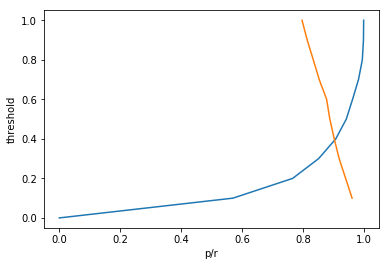

In [107]:
plt.ylabel('threshold')
plt.xlabel('p/r')

plt.plot(r,thresh_val)
plt.plot(p,thresh_val)

In [108]:
new_pred = y_pred >= 0.4

In [109]:
old_pred = y_pred >= 0.5

In [110]:
def acc(y_,y_test):

    compared = y_==test

    wrong = np.where(compared==False)[0]

    return((len(y_)-len(wrong))/len(y_))

In [111]:
acc(old_pred,y_pred)

0.8605

In [112]:
acc(new_pred,y_pred)

0.8495

In [114]:
from sklearn.metrics import roc_curve

y_pred_keras = churn_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [115]:
yi = churn_model.predict(X_test)

In [121]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics.ranking:

roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC)
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    
    y_true : array, shape = [n_samples]
        True binary labels in range {0, 1} or {-1, 1}.  If labels are not
        binary, pos_label should be explicitly given.
    
    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        Label considered as positive and others are considered negative.
    
    sample_weight : array-like of shape = [n_samples], optiona